In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("C:\\Users\\ARPAN SAHA\\Desktop\playstore-analysis (2) (1).csv")

# Drop records where rating is missing since rating is our target/study variable

In [9]:
 df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

# Are all 3 records having the same problem?

In [10]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Drop the 3rd record i.e. record for “Life Made WIFI …”

In [11]:
df.drop([10472], inplace = True)

# Replace remaining missing values with the mode

In [12]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

# Current ver – replace with most common value

In [13]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

# Which all variables need to be brought to numeric types?

In [14]:
#Rating and Installs

# Price variable – remove $ sign and convert to float

In [15]:
price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  

In [16]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

# Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [17]:
install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

# Convert all other identified columns to numeric

In [18]:
df['Reviews']= df['Reviews'].astype('int')

# Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.
i. Are there any such records? Drop if so.


In [19]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# b. Reviews should not be more than installs as only those who installed can review the app.

In [20]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


# i. Are there any such records? Drop if so

In [21]:

x = df[df['Reviews']>df['Installs']].index
df.drop(labels=x, inplace=True)


In [22]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Make suitable plot to identify outliers in price

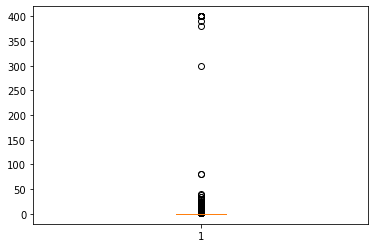

In [23]:
plt.boxplot(df['Price'])
plt.show()

# Do you expect apps on the play store to cost $200? Check out these cases

In [25]:
#Yes we can expect apps on the play store to cost $200
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


# Limit data to records with price < $30

In [99]:
grt_30 = df[df['Price'] > 30].index
df.drop(labels=grt_30, inplace=True)


# After dropping the useless records, make the suitable plot again to identify outliers

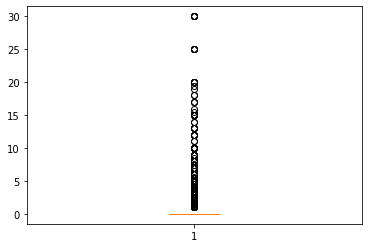

In [100]:
plt.boxplot(df['Price'])
plt.show()


# Reviews column
i. Make suitable plot

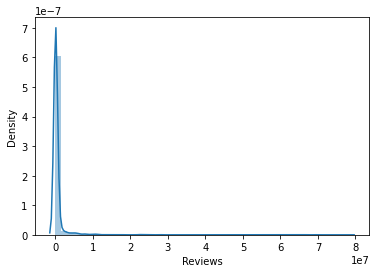

In [27]:
sns.distplot(df['Reviews'])
plt.show()


# Limit data to apps with < 1 Million reviews

In [102]:
grt_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = grt_1m, inplace=True)

# What is the 95th percentile of the installs?

In [103]:
df.Installs.quantile(0.95) 

10000000.0

# ii. Drop records having a value more than the 95th percentile

In [104]:
temp = df[df["Installs"] >df.Installs.quantile(0.95)].index
df.drop(labels = temp, inplace = True)

# What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values

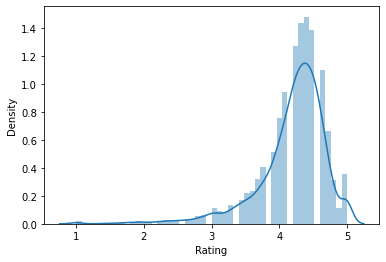

The skewness of this distribution is -1.8530611951252525
The Median of this distribution 4.3 is greater than mean 4.191174270755429 of this distribution


In [28]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))


# How do you explain this?b. What is the implication of this on your analysis

In [106]:
df['Rating'].mode()
#Since mode= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

0    4.3
dtype: float64

# What are the top Content Rating values?Are there any values with very few records

In [107]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# If yes, drop those as they won’t help in the analysis

In [108]:
cr = []
for k in df['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

df['Content Rating']=cr

In [109]:
temp1 = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp1, inplace=True)

# Make a joinplot to understand the effect of size on rating, b. Do you see any patterns? c. How do you explain the pattern?

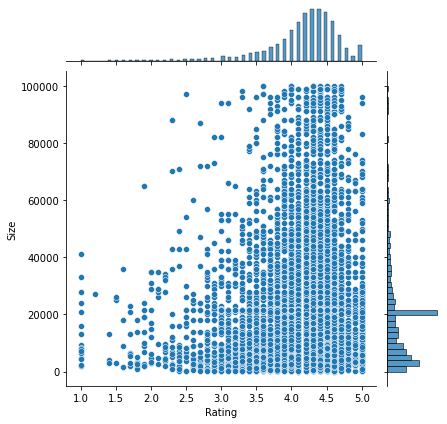

In [110]:
sns.jointplot(y ='Size', x ='Rating', data = df)
plt.show()
#Their is correlation between Size and Rating.
#For higher Rating, their is constant Size

# Make a jointplot (with regression line), b. What pattern do you see? c. How do you explain the pattern?

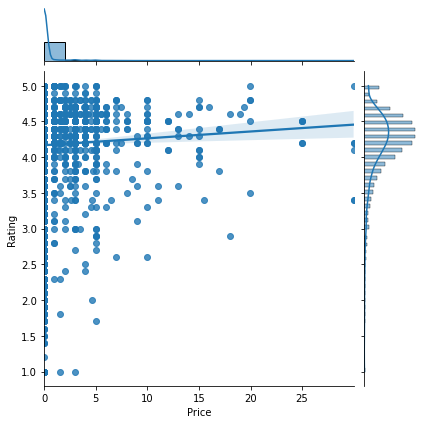

In [111]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()
#Generally on increasing the Price, Rating remains almost constant.
#Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

# d. Replot the data, this time with only records with price > 0, e. Does the pattern change? f. What is your overall inference on the effect of price on the rating 

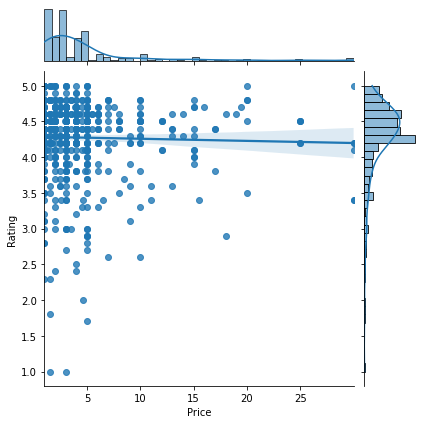

In [112]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()
#Their is very weakly Negative Correlation between Price and Rating.
# Increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4.

# Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

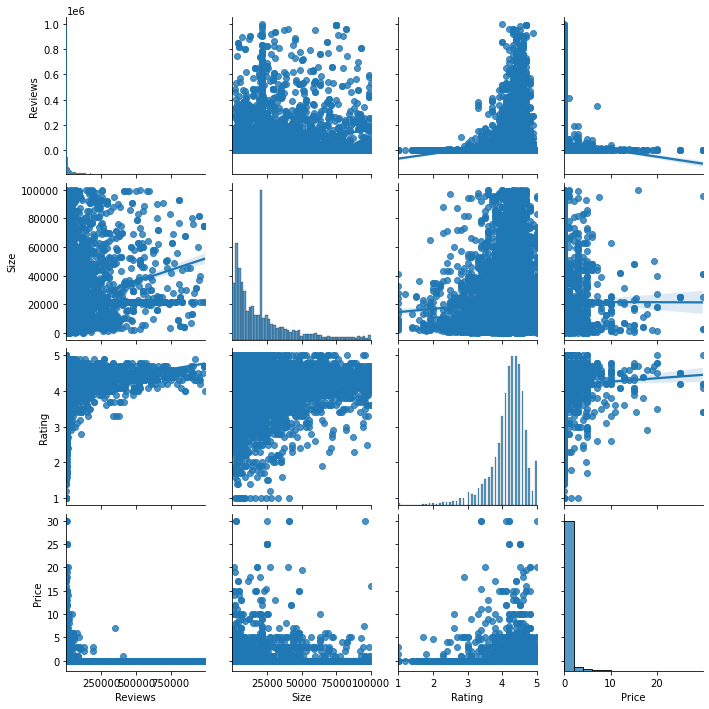

In [113]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Make a bar plot displaying the rating for each content rating

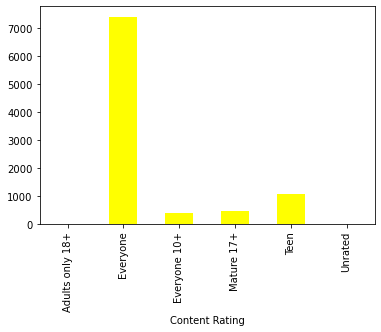

In [30]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="yellow")
plt.show()

# Which metric would you use? Mean? Median? Some other quantile? c. Choose the right metric and plot

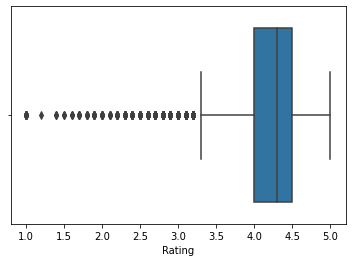

In [36]:
sns.boxplot(df['Rating'])
plt.show()


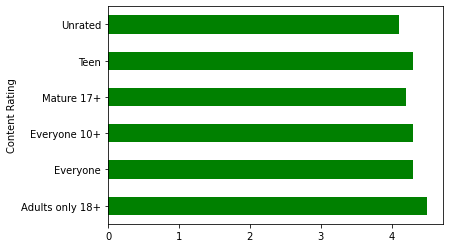

In [34]:
#We must use Median in this case as we are having Outliers in Rating
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="green")
plt.show()

# Create 5 buckets (20% records in each) based on Size

In [116]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


# By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [117]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


# Make a heatmap of this i. Annotated

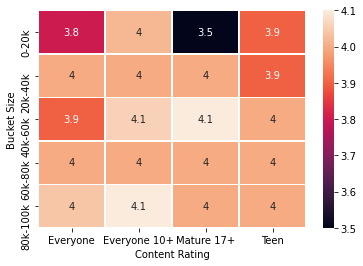

In [118]:
sns.heatmap(temp3, annot=True, linewidths=0.5)
plt.show()

# Greens color map

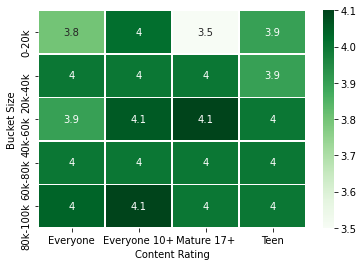

In [119]:
sns.heatmap(temp3, annot=True, linewidths=0.5, cmap='Greens')
plt.show()

# What’s your inference? Are lighter apps preferred in all categories? Heavier Some?

In [ ]:
# We can conclude that heavier apps are preferred in all categories.